In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnb-washington/airbnb_Washington.csv


In [2]:
df = pd.read_csv('/kaggle/input/airbnb-washington/airbnb_Washington.csv')

In [3]:
sel_cols = ['Airbnb Host ID', 'Airbnb Property ID','superhost_period_all','Superhost','prev_host_is_superhost','rating_ave_pastYear',
            'numReviews_pastYear','numCancel_pastYear','prop_5_StarReviews_pastYear','prev_rating_ave_pastYear', 
            'prev_numReviews_pastYear', 'prev_numCancel_pastYear', 'prev_prop_5_StarReviews_pastYear', 'numReservedDays_pastYear', 
            'numReserv_pastYear', 'prev_numReservedDays_pastYear', 'prev_numReserv_pastYear', 'hostResponseNumber_pastYear', 
            'hostResponseAverage_pastYear', 'prev_hostResponseNumber_pastYear', 'prev_hostResponseAverage_pastYear', 'available_days',
            'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice', 'prev_available_days', 'prev_available_days_aveListedPrice',
            'prev_booked_days', 'prev_booked_days_avePrice', 'Bedrooms', 'Bathrooms', 'Max Guests', 'Cleaning Fee (USD)', 'Minimum Stay', 
            'Number of Photos','Instantbook Enabled', 'prev_Instantbook Enabled', 'Nightly Rate', 'prev_Nightly Rate', 'Number of Reviews', 
            'prev_Number of Reviews', 'Rating Overall', 'prev_Rating Overall', 'revenue', 'occupancy_rate', 'prev_revenue', 'prev_occupancy_rate',
            'tract_total_pop', 'tract_white_perc', 'tract_black_perc', 'tract_asian_perc', 'tract_housing_units', 'zip_total_population', 
            'zip_hispanic_or_latino_anyrace', 'zip_hispanic_or_latino_anyrace_percent', 'zip_white_nothispanic', 'zip_white_nothispanic_percent', 
            'zip_black_nothispanic', 'zip_black_nothispanic_percent', 'zip_asian_nothispanic', 'zip_asian_nothispanic_percent', 'tract_count_obs', 
            'tract_unique_prices','Nightly Rate_tractQuartile', 'prev_Nightly Rate_tractQuartile', 'available_days_aveListedPrice_tractQuartile', 
            'prev_available_days_aveListedPrice_tractQuartile', 'tract_superhosts', 'tract_superhosts_ratio', 'tract_prev_superhosts', 
            'tract_prev_superhosts_ratio', 'tract_price_variance', 'tractQuartilePrice_variance','booked_days_period_city', 'revenue_period_city', 
            'booked_days_period_tract', 'revenue_period_tract', 'tract_booking_share', 'tract_revenue_share']

df_selected = df[sel_cols]

In [4]:
df_selected['Airbnb Host ID'].nunique()

12073

In [5]:
from dateutil.relativedelta import relativedelta
test = pd.DataFrame()
test['Scraped Date'] = pd.to_datetime(df['Scraped Date'])
test['Created Date'] = pd.to_datetime(df['Created Date'])

# Calculate the difference in years and months
test['year_difference'] = test.apply(lambda row: relativedelta(row['Scraped Date'], row['Created Date']).years, axis=1)
test['month_difference'] = test.apply(lambda row: relativedelta(row['Scraped Date'], row['Created Date']).months, axis=1)

# Convert years to months and store in a new column
test['total_month_difference'] = abs(test['year_difference'] * 12 + test['month_difference'])
df_selected['months_with_bnb'] = test['total_month_difference']

/tmp/ipykernel_19/224366412.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['months_with_bnb'] = test['total_month_difference']


In [6]:
df_sorted = df_selected.sort_values(by='superhost_period_all')
df_sorted['Prop_Churned'] = df_sorted.groupby('Airbnb Property ID')['Airbnb Property ID'].shift(-1).isna().astype(int)

In [7]:
prd5 = df_sorted[df_sorted['superhost_period_all'] == 5]
prd_not20 = df_sorted[df_sorted['superhost_period_all'] != 20]
prd20 = df_sorted[df_sorted['superhost_period_all'] == 20]

In [8]:
prd_not20.columns

Index(['Airbnb Host ID', 'Airbnb Property ID', 'superhost_period_all',
       'Superhost', 'prev_host_is_superhost', 'rating_ave_pastYear',
       'numReviews_pastYear', 'numCancel_pastYear',
       'prop_5_StarReviews_pastYear', 'prev_rating_ave_pastYear',
       'prev_numReviews_pastYear', 'prev_numCancel_pastYear',
       'prev_prop_5_StarReviews_pastYear', 'numReservedDays_pastYear',
       'numReserv_pastYear', 'prev_numReservedDays_pastYear',
       'prev_numReserv_pastYear', 'hostResponseNumber_pastYear',
       'hostResponseAverage_pastYear', 'prev_hostResponseNumber_pastYear',
       'prev_hostResponseAverage_pastYear', 'available_days',
       'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice',
       'prev_available_days', 'prev_available_days_aveListedPrice',
       'prev_booked_days', 'prev_booked_days_avePrice', 'Bedrooms',
       'Bathrooms', 'Max Guests', 'Cleaning Fee (USD)', 'Minimum Stay',
       'Number of Photos', 'Instantbook Enabled', 'prev_In

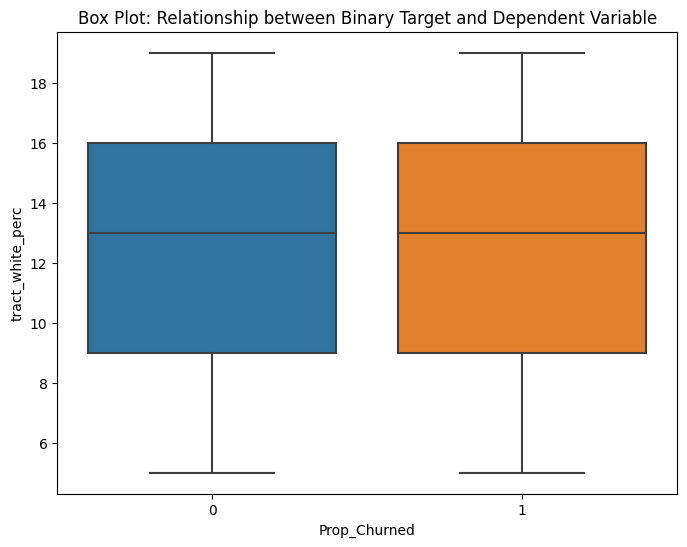

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Prop_Churned', y='superhost_period_all', data=prd_not20)
plt.xlabel('Prop_Churned')
plt.ylabel('tract_white_perc')
plt.title('Box Plot: Relationship between Binary Target and Dependent Variable')
plt.show()


In [10]:
model_vars = ['Airbnb Property ID', 'superhost_period_all','rating_ave_pastYear',
'numReviews_pastYear' ,
'numReservedDays_pastYear',
'numReserv_pastYear',
'prev_numReservedDays_pastYear',
'hostResponseNumber_pastYear',
'hostResponseAverage_pastYear',
'prev_hostResponseNumber_pastYear',
'prev_hostResponseAverage_pastYear',
'available_days',
'booked_days',
'booked_days_avePrice',
'Bedrooms',
'Max Guests',
'Cleaning Fee (USD)',
'Number of Photos',
'Nightly Rate',
'prev_Number of Reviews',
'Rating Overall',
'revenue',
'prev_revenue',
'prev_occupancy_rate',
'tract_total_pop',
'tract_asian_perc',
'zip_white_nothispanic_percent',
'Nightly Rate_tractQuartile',
'tract_superhosts',
'tract_superhosts_ratio',
'tract_prev_superhosts','months_with_bnb','Prop_Churned']

In [11]:
prd5_model_vars = prd5[model_vars]
prd_not20_model_vars = prd_not20[model_vars]
prd20_model_vars = prd20[model_vars]

In [12]:
prd_not20_model_vars.isnull().sum()

Airbnb Property ID                       0
superhost_period_all                     0
rating_ave_pastYear                  36421
numReviews_pastYear                  35022
numReservedDays_pastYear             14344
numReserv_pastYear                   14344
prev_numReservedDays_pastYear        21425
hostResponseNumber_pastYear          23161
hostResponseAverage_pastYear         23161
prev_hostResponseNumber_pastYear     30874
prev_hostResponseAverage_pastYear    30874
available_days                       29895
booked_days                          57209
booked_days_avePrice                 57209
Bedrooms                                28
Max Guests                               5
Cleaning Fee (USD)                   30006
Number of Photos                         5
Nightly Rate                             0
prev_Number of Reviews                7104
Rating Overall                       25951
revenue                              57209
prev_revenue                         58146
prev_occupa

In [13]:
selected_rows_revenue_nan = prd_not20_model_vars[prd_not20_model_vars['revenue'].isna()][['revenue', 'booked_days', 'booked_days_avePrice']]
print(selected_rows_revenue_nan)


        revenue  booked_days  booked_days_avePrice
25983       NaN          NaN                   NaN
40557       NaN          NaN                   NaN
27093       NaN          NaN                   NaN
27054       NaN          NaN                   NaN
54216       NaN          NaN                   NaN
...         ...          ...                   ...
118986      NaN          NaN                   NaN
120232      NaN          NaN                   NaN
81443       NaN          NaN                   NaN
106517      NaN          NaN                   NaN
108907      NaN          NaN                   NaN

[57209 rows x 3 columns]


In [14]:
prd_not20_model_vars['booked_days'].value_counts()

booked_days
1.0      2346
2.0      2176
3.0      2175
4.0      2121
7.0      1841
         ... 
151.0       1
128.0       1
140.0       1
137.0       1
170.0       1
Name: count, Length: 141, dtype: int64

In [15]:
prd5_model_vars_dropna = prd5_model_vars.dropna()
prd_not20_model_vars_dropna = prd_not20_model_vars.dropna()

In [16]:
prd5_model_vars_dropna['Prop_Churned'].value_counts()
prd_not20_model_vars_dropna['Prop_Churned'].value_counts()

Prop_Churned
0    38036
1     2442
Name: count, dtype: int64

In [17]:
import statsmodels.api as sm
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score

X = prd5_model_vars_dropna.drop('Prop_Churned', axis=1)
y = prd5_model_vars_dropna['Prop_Churned']

# Adding a constant term to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Creating and fitting the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Predicting the target variable
y_pred = result.predict(X)
y_pred_binary = (y_pred > 0.08).astype(int)

# Calculating metrics
accuracy = accuracy_score(y, y_pred_binary)
conf_matrix = confusion_matrix(y, y_pred_binary)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Displaying the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.216495
         Iterations 8
Accuracy: 0.739612188365651
Confusion Matrix:
 [[995 344]
 [ 32  73]]
Sensitivity: 0.6952380952380952
Specificity: 0.743091859596714
                           Logit Regression Results                           
Dep. Variable:           Prop_Churned   No. Observations:                 1444
Model:                          Logit   Df Residuals:                     1412
Method:                           MLE   Df Model:                           31
Date:                Tue, 09 Jan 2024   Pseudo R-squ.:                  0.1693
Time:                        23:09:35   Log-Likelihood:                -312.62
converged:                       True   LL-Null:                       -376.31
Covariance Type:            nonrobust   LLR p-value:                 1.208e-13
                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

In [18]:
import statsmodels.api as sm
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score

X = prd_not20_model_vars_dropna.drop('Prop_Churned', axis=1)
y = prd_not20_model_vars_dropna['Prop_Churned']

# Adding a constant term to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Creating and fitting the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Predicting the target variable
y_pred = result.predict(X)
y_pred_binary = (y_pred > 0.08).astype(int)

# Calculating metrics
accuracy = accuracy_score(y, y_pred_binary)
conf_matrix = confusion_matrix(y, y_pred_binary)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Displaying the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.202753
         Iterations 8
Accuracy: 0.794975048174317
Confusion Matrix:
 [[30751  7285]
 [ 1014  1428]]
Sensitivity: 0.5847665847665847
Specificity: 0.8084709222841518
                           Logit Regression Results                           
Dep. Variable:           Prop_Churned   No. Observations:                40478
Model:                          Logit   Df Residuals:                    40445
Method:                           MLE   Df Model:                           32
Date:                Tue, 09 Jan 2024   Pseudo R-squ.:                  0.1102
Time:                        23:09:36   Log-Likelihood:                -8207.0
converged:                       True   LL-Null:                       -9223.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
----------------------

In [19]:
prd5_model_vars_imputed = prd5_model_vars
prd_not20_model_vars_imputed = prd_not20_model_vars
prd20_model_vars_imputed = prd20_model_vars

In [20]:
prd5_model_vars_imputed['rating_ave_pastYear'].fillna(prd5_model_vars_imputed['rating_ave_pastYear'].median(), inplace=True)
prd5_model_vars_imputed['numReviews_pastYear'].fillna(prd5_model_vars_imputed['numReviews_pastYear'].median(), inplace=True)
prd5_model_vars_imputed['numReservedDays_pastYear'].fillna(prd5_model_vars_imputed['numReservedDays_pastYear'].median(), inplace=True)
prd5_model_vars_imputed['numReserv_pastYear'].fillna(prd5_model_vars_imputed['numReserv_pastYear'].median(), inplace=True)
prd5_model_vars_imputed['prev_numReservedDays_pastYear'].fillna(prd5_model_vars_imputed['prev_numReservedDays_pastYear'].median(), inplace=True)
prd5_model_vars_imputed['hostResponseNumber_pastYear'].fillna(prd5_model_vars_imputed['hostResponseNumber_pastYear'].median(), inplace=True)
prd5_model_vars_imputed['hostResponseAverage_pastYear'].fillna(prd5_model_vars_imputed['hostResponseAverage_pastYear'].median(), inplace=True)
prd5_model_vars_imputed['prev_hostResponseNumber_pastYear'].fillna(prd5_model_vars_imputed['prev_hostResponseNumber_pastYear'].median(), inplace=True)
prd5_model_vars_imputed['prev_hostResponseAverage_pastYear'].fillna(prd5_model_vars_imputed['prev_hostResponseAverage_pastYear'].median(), inplace=True)
prd5_model_vars_imputed['available_days'].fillna(prd5_model_vars_imputed['available_days'].median(), inplace=True)
prd5_model_vars_imputed['booked_days'].fillna(0, inplace=True)
prd5_model_vars_imputed['booked_days_avePrice'].fillna(0, inplace=True)
prd5_model_vars_imputed['Bedrooms'].fillna(prd5_model_vars_imputed['Bedrooms'].median(), inplace=True)

prd5_model_vars_imputed['Cleaning Fee (USD)'].fillna(prd5_model_vars_imputed['Cleaning Fee (USD)'].median(), inplace=True)
prd5_model_vars_imputed['prev_Number of Reviews'].fillna(prd5_model_vars_imputed['prev_Number of Reviews'].median(), inplace=True)
prd5_model_vars_imputed['Rating Overall'].fillna(prd5_model_vars_imputed['Rating Overall'].median(), inplace=True)
prd5_model_vars_imputed['revenue'].fillna(0, inplace=True)
prd5_model_vars_imputed['prev_revenue'].fillna(0, inplace=True)
prd5_model_vars_imputed['prev_occupancy_rate'].fillna(0, inplace=True)

prd5_model_vars_imputed['zip_white_nothispanic_percent'].fillna(prd5_model_vars_imputed['zip_white_nothispanic_percent'].median(), inplace=True)
prd5_model_vars_imputed['Nightly Rate_tractQuartile'].fillna(prd5_model_vars_imputed['Nightly Rate_tractQuartile'].median(), inplace=True)

/tmp/ipykernel_19/1520844269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prd5_model_vars_imputed['rating_ave_pastYear'].fillna(prd5_model_vars_imputed['rating_ave_pastYear'].median(), inplace=True)
/tmp/ipykernel_19/1520844269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prd5_model_vars_imputed['numReviews_pastYear'].fillna(prd5_model_vars_imputed['numReviews_pastYear'].median(), inplace=True)
/tmp/ipykernel_19/1520844269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [21]:
prd_not20_model_vars_imputed['rating_ave_pastYear'].fillna(prd_not20_model_vars_imputed['rating_ave_pastYear'].median(), inplace=True)
prd_not20_model_vars_imputed['numReviews_pastYear'].fillna(prd_not20_model_vars_imputed['numReviews_pastYear'].median(), inplace=True)
prd_not20_model_vars_imputed['numReservedDays_pastYear'].fillna(prd_not20_model_vars_imputed['numReservedDays_pastYear'].median(), inplace=True)
prd_not20_model_vars_imputed['numReserv_pastYear'].fillna(prd_not20_model_vars_imputed['numReserv_pastYear'].median(), inplace=True)
prd_not20_model_vars_imputed['prev_numReservedDays_pastYear'].fillna(prd_not20_model_vars_imputed['prev_numReservedDays_pastYear'].median(), inplace=True)
prd_not20_model_vars_imputed['hostResponseNumber_pastYear'].fillna(prd_not20_model_vars_imputed['hostResponseNumber_pastYear'].median(), inplace=True)
prd_not20_model_vars_imputed['hostResponseAverage_pastYear'].fillna(prd_not20_model_vars_imputed['hostResponseAverage_pastYear'].median(), inplace=True)
prd_not20_model_vars_imputed['prev_hostResponseNumber_pastYear'].fillna(prd_not20_model_vars_imputed['prev_hostResponseNumber_pastYear'].median(), inplace=True)
prd_not20_model_vars_imputed['prev_hostResponseAverage_pastYear'].fillna(prd_not20_model_vars_imputed['prev_hostResponseAverage_pastYear'].median(), inplace=True)
prd_not20_model_vars_imputed['available_days'].fillna(prd_not20_model_vars_imputed['available_days'].median(), inplace=True)
prd_not20_model_vars_imputed['booked_days'].fillna(0, inplace=True)
prd_not20_model_vars_imputed['booked_days_avePrice'].fillna(0, inplace=True)
prd_not20_model_vars_imputed['Bedrooms'].fillna(prd_not20_model_vars_imputed['Bedrooms'].median(), inplace=True)

prd_not20_model_vars_imputed['Cleaning Fee (USD)'].fillna(prd_not20_model_vars_imputed['Cleaning Fee (USD)'].median(), inplace=True)
prd_not20_model_vars_imputed['prev_Number of Reviews'].fillna(prd_not20_model_vars_imputed['prev_Number of Reviews'].median(), inplace=True)
prd_not20_model_vars_imputed['Rating Overall'].fillna(prd_not20_model_vars_imputed['Rating Overall'].median(), inplace=True)
prd_not20_model_vars_imputed['revenue'].fillna(0, inplace=True)
prd_not20_model_vars_imputed['prev_revenue'].fillna(0, inplace=True)
prd_not20_model_vars_imputed['prev_occupancy_rate'].fillna(0, inplace=True)

prd_not20_model_vars_imputed['zip_white_nothispanic_percent'].fillna(prd_not20_model_vars_imputed['zip_white_nothispanic_percent'].median(), inplace=True)
prd_not20_model_vars_imputed['Nightly Rate_tractQuartile'].fillna(prd_not20_model_vars_imputed['Nightly Rate_tractQuartile'].median(), inplace=True)

prd_not20_model_vars_imputed['Max Guests'].fillna(prd_not20_model_vars_imputed['Max Guests'].median(), inplace=True)
prd_not20_model_vars_imputed['Number of Photos'].fillna(prd_not20_model_vars_imputed['Number of Photos'].median(), inplace=True)

/tmp/ipykernel_19/241947500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prd_not20_model_vars_imputed['rating_ave_pastYear'].fillna(prd_not20_model_vars_imputed['rating_ave_pastYear'].median(), inplace=True)
/tmp/ipykernel_19/241947500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prd_not20_model_vars_imputed['numReviews_pastYear'].fillna(prd_not20_model_vars_imputed['numReviews_pastYear'].median(), inplace=True)
/tmp/ipykernel_19/241947500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [22]:
prd20_model_vars_imputed['rating_ave_pastYear'].fillna(prd20_model_vars_imputed['rating_ave_pastYear'].median(), inplace=True)
prd20_model_vars_imputed['numReviews_pastYear'].fillna(prd20_model_vars_imputed['numReviews_pastYear'].median(), inplace=True)
prd20_model_vars_imputed['numReservedDays_pastYear'].fillna(prd20_model_vars_imputed['numReservedDays_pastYear'].median(), inplace=True)
prd20_model_vars_imputed['numReserv_pastYear'].fillna(prd20_model_vars_imputed['numReserv_pastYear'].median(), inplace=True)
prd20_model_vars_imputed['prev_numReservedDays_pastYear'].fillna(prd20_model_vars_imputed['prev_numReservedDays_pastYear'].median(), inplace=True)
prd20_model_vars_imputed['hostResponseNumber_pastYear'].fillna(prd20_model_vars_imputed['hostResponseNumber_pastYear'].median(), inplace=True)
prd20_model_vars_imputed['hostResponseAverage_pastYear'].fillna(prd20_model_vars_imputed['hostResponseAverage_pastYear'].median(), inplace=True)
prd20_model_vars_imputed['prev_hostResponseNumber_pastYear'].fillna(prd20_model_vars_imputed['prev_hostResponseNumber_pastYear'].median(), inplace=True)
prd20_model_vars_imputed['prev_hostResponseAverage_pastYear'].fillna(prd20_model_vars_imputed['prev_hostResponseAverage_pastYear'].median(), inplace=True)
prd20_model_vars_imputed['available_days'].fillna(prd20_model_vars_imputed['available_days'].median(), inplace=True)
prd20_model_vars_imputed['booked_days'].fillna(0, inplace=True)
prd20_model_vars_imputed['booked_days_avePrice'].fillna(0, inplace=True)
prd20_model_vars_imputed['Bedrooms'].fillna(prd20_model_vars_imputed['Bedrooms'].median(), inplace=True)

prd20_model_vars_imputed['Cleaning Fee (USD)'].fillna(prd20_model_vars_imputed['Cleaning Fee (USD)'].median(), inplace=True)
prd20_model_vars_imputed['prev_Number of Reviews'].fillna(prd20_model_vars_imputed['prev_Number of Reviews'].median(), inplace=True)
prd20_model_vars_imputed['Rating Overall'].fillna(prd20_model_vars_imputed['Rating Overall'].median(), inplace=True)
prd20_model_vars_imputed['revenue'].fillna(0, inplace=True)
prd20_model_vars_imputed['prev_revenue'].fillna(0, inplace=True)
prd20_model_vars_imputed['prev_occupancy_rate'].fillna(0, inplace=True)

prd20_model_vars_imputed['zip_white_nothispanic_percent'].fillna(prd20_model_vars_imputed['zip_white_nothispanic_percent'].median(), inplace=True)
prd20_model_vars_imputed['Nightly Rate_tractQuartile'].fillna(prd20_model_vars_imputed['Nightly Rate_tractQuartile'].median(), inplace=True)

prd20_model_vars_imputed['Max Guests'].fillna(prd20_model_vars_imputed['Max Guests'].median(), inplace=True)
prd20_model_vars_imputed['Number of Photos'].fillna(prd20_model_vars_imputed['Number of Photos'].median(), inplace=True)

/tmp/ipykernel_19/623045405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prd20_model_vars_imputed['rating_ave_pastYear'].fillna(prd20_model_vars_imputed['rating_ave_pastYear'].median(), inplace=True)
/tmp/ipykernel_19/623045405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prd20_model_vars_imputed['numReviews_pastYear'].fillna(prd20_model_vars_imputed['numReviews_pastYear'].median(), inplace=True)
/tmp/ipykernel_19/623045405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [23]:
prd_not20_model_vars_imputed

,Airbnb Property ID,superhost_period_all,rating_ave_pastYear,numReviews_pastYear,numReservedDays_pastYear,numReserv_pastYear,prev_numReservedDays_pastYear,hostResponseNumber_pastYear,hostResponseAverage_pastYear,prev_hostResponseNumber_pastYear,...,prev_occupancy_rate,tract_total_pop,tract_asian_perc,zip_white_nothispanic_percent,Nightly Rate_tractQuartile,tract_superhosts,tract_superhosts_ratio,tract_prev_superhosts,months_with_bnb,Prop_Churned
25983,6953706.0,5.0,4.405738,244.0,2427.0,386.0,1677.0,206.0,93.912621,187.0,...,0.000000,2682,12.6,43.1,0.0,2.0,0.052632,1.0,13,0
3946,805490.0,5.0,4.142857,175.0,685.0,329.0,608.0,63.0,97.095238,54.0,...,0.200913,3147,10.7,43.1,0.0,8.0,0.177778,7.0,44,0
54258,13698365.0,5.0,4.805195,77.0,1215.0,305.0,660.0,71.0,99.788732,54.0,...,0.000000,5986,7.1,52.3,3.0,11.0,0.118280,9.0,1,0
40544,10416451.0,5.0,4.393443,122.0,921.0,293.0,558.0,59.0,88.271186,56.0,...,0.182390,2890,6.4,1.3,0.0,0.0,0.000000,0.0,6,0
10616,2551952.0,5.0,4.869565,23.0,196.0,43.0,176.0,31.0,93.000000,29.0,...,0.000000,5259,5.2,60.3,3.0,12.0,0.235294,9.0,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108907,22967033.0,19.0,4.900000,40.0,135.0,71.0,174.0,16.0,100.000000,21.0,...,0.000000,3144,1.1,28.5,1.0,8.0,0.333333,7.0,24,0
18505,4865538.0,19.0,4.888889,9.0,183.0,47.0,204.0,22.0,98.636364,19.0,...,0.005051,1708,3.9,28.5,2.0,5.0,0.263158,5.0,61,1
109783,23304101.0,19.0,4.797403,1925.0,13291.0,4223.0,12647.0,286.0,99.300699,319.0,...,0.103139,4901,2.2,43.1,1.0,29.0,0.266055,31.0,23,0
20568,5570026.0,19.0,4.546624,311.0,1100.0,487.0,1132.0,108.0,98.509259,115.0,...,0.009009,1711,10.5,76.4,0.0,8.0,0.126984,7.0,58,0


In [24]:
prd_not20_model_vars_imputed = prd_not20_model_vars_imputed.drop('Airbnb Property ID', axis=1)

In [25]:
import statsmodels.api as sm
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score

X = prd_not20_model_vars_imputed.drop('Prop_Churned', axis=1)
y = prd_not20_model_vars_imputed['Prop_Churned']

# Adding a constant term to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Creating and fitting the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Predicting the target variable
y_pred = result.predict(X)
y_pred_binary = (y_pred > 0.1).astype(int)

# Calculating metrics
accuracy = accuracy_score(y, y_pred_binary)
conf_matrix = confusion_matrix(y, y_pred_binary)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Displaying the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.299731
         Iterations 7
Accuracy: 0.6620978306016166
Confusion Matrix:
 [[75784 37431]
 [ 4873  7108]]
Sensitivity: 0.593272681746098
Specificity: 0.6693812657333392
                           Logit Regression Results                           
Dep. Variable:           Prop_Churned   No. Observations:               125196
Model:                          Logit   Df Residuals:                   125164
Method:                           MLE   Df Model:                           31
Date:                Tue, 09 Jan 2024   Pseudo R-squ.:                 0.05006
Time:                        23:09:37   Log-Likelihood:                -37525.
converged:                       True   LL-Null:                       -39503.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
----------------------

In [26]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming X is your feature matrix and y is your target variable
# X should be a DataFrame with the predictor variables, and y should be a Series with the target variable.

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Function for backward elimination
def backward_elimination(X, y, threshold=0.1):
    cols = X.columns.tolist()
    while True:
        logit_model = sm.Logit(y, X)
        result = logit_model.fit(disp=0)
        p_values = result.pvalues[1:]  # Exclude the constant term
        max_p_value = p_values.max()
        if max_p_value > threshold:
            # Remove the variable with the highest p-value
            remove_col = p_values.idxmax()
            cols.remove(remove_col)
            X = X[cols]
        else:
            break
    return result

# Backward elimination on the standardized data
result_final = backward_elimination(pd.DataFrame(X_train, columns=X_train.columns), y_train)
print(result_final.summary())
# Predicting the target variable on the testing set
X_test_final = sm.add_constant(X_test[result_final.model.exog_names[1:]])
y_pred = result_final.predict(X_test_final)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Displaying the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print(result_final.summary())


                           Logit Regression Results                           
Dep. Variable:           Prop_Churned   No. Observations:               100156
Model:                          Logit   Df Residuals:                   100131
Method:                           MLE   Df Model:                           24
Date:                Tue, 09 Jan 2024   Pseudo R-squ.:                 0.04981
Time:                        23:09:39   Log-Likelihood:                -29787.
converged:                       True   LL-Null:                       -31348.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                2.8859      0.176     16.367      0.000       2.540       3.231
superhost_period_all                 0.0267      0.003      8.092

In [27]:
X_test_final = sm.add_constant(X_test[result_final.model.exog_names[1:]])
y_pred = result_final.predict(X_test_final)
y_pred_binary = (y_pred > 0.1).astype(int)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Displaying the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print(result_final.summary())

Accuracy: 0.6684904153354633
Confusion Matrix:
 [[15266  7265]
 [ 1036  1473]]
Sensitivity: 0.5870864886408927
Specificity: 0.6775553681594247
                           Logit Regression Results                           
Dep. Variable:           Prop_Churned   No. Observations:               100156
Model:                          Logit   Df Residuals:                   100131
Method:                           MLE   Df Model:                           24
Date:                Tue, 09 Jan 2024   Pseudo R-squ.:                 0.04981
Time:                        23:09:39   Log-Likelihood:                -29787.
converged:                       True   LL-Null:                       -31348.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                  

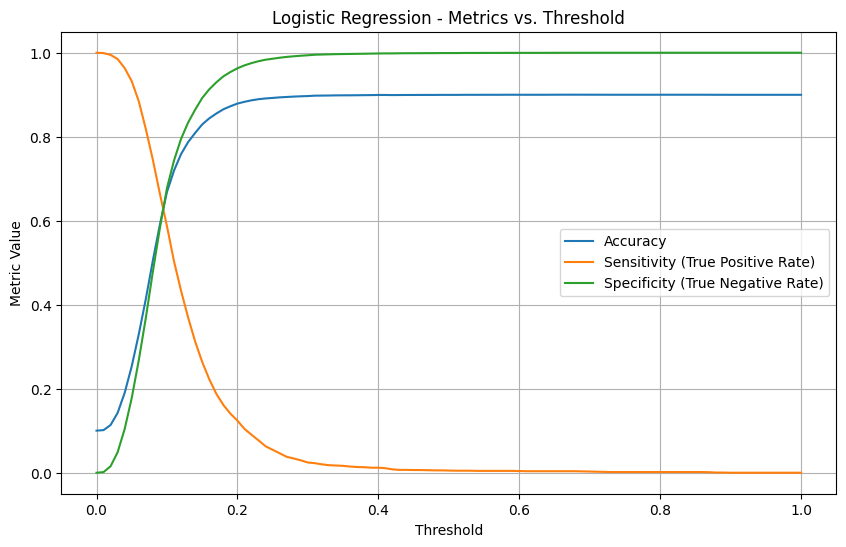

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming you have calculated y_pred and y_test before this point

# Create an array of threshold values
thresholds = np.arange(0, 1.01, 0.01)

# Initialize empty lists to store metrics
accuracy_list = []
sensitivity_list = []
specificity_list = []

# Calculate metrics for each threshold
for threshold in thresholds:
    y_pred = result_final.predict(X_test_final)
    y_pred_binary = (y_pred > threshold).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred_binary)
    conf_matrix = confusion_matrix(y_test, y_pred_binary)
    
    sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1] + 1e-10)  # Adding a small value to avoid division by zero
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1] + 1e-10)
    
    accuracy_list.append(accuracy)
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy_list, label='Accuracy')
plt.plot(thresholds, sensitivity_list, label='Sensitivity (True Positive Rate)')
plt.plot(thresholds, specificity_list, label='Specificity (True Negative Rate)')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Logistic Regression - Metrics vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming X is your feature matrix and y is your target variable
# X should be a DataFrame with the predictor variables, and y should be a Series with the target variable.

X = prd_not20_model_vars_imputed.drop('Prop_Churned', axis=1)
y = prd_not20_model_vars_imputed['Prop_Churned']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data with probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Adjust the threshold (replace 0.5 with your desired threshold)
custom_threshold = 0.1
y_pred_custom = (y_probs > custom_threshold).astype(int)

# Evaluate the model
accuracy_custom = accuracy_score(y_test, y_pred_custom)
conf_matrix_custom = confusion_matrix(y_test, y_pred_custom)

# Calculate sensitivity and specificity
tn, fp, fn, tp = conf_matrix_custom.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Displaying the results
print("Accuracy with Custom Threshold:", accuracy_custom)
print("Confusion Matrix with Custom Threshold:\n", conf_matrix_custom)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)


Accuracy with Custom Threshold: 0.8527955271565495
Confusion Matrix with Custom Threshold:
 [[20641  1890]
 [ 1796   713]]
Sensitivity (Recall): 0.28417696293343964
Specificity: 0.9161155740979096


In [30]:
"""from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Assuming X is your feature matrix and y is your target variable
# X should be a DataFrame with the predictor variables, and y should be a Series with the target variable.

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1"], rounded=True)
plt.show()

# Make predictions on the testing data with probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Adjust the threshold (replace 0.5 with your desired threshold)
custom_threshold = 0.1
y_pred_custom = (y_probs > custom_threshold).astype(int)

# Evaluate the model
accuracy_custom = accuracy_score(y_test, y_pred_custom)
conf_matrix_custom = confusion_matrix(y_test, y_pred_custom)

# Displaying the results
print("Accuracy with Custom Threshold:", accuracy_custom)
print("Confusion Matrix with Custom Threshold:\n", conf_matrix_custom)
"""

'from sklearn.tree import DecisionTreeClassifier, plot_tree\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score, confusion_matrix\nimport matplotlib.pyplot as plt\n\n# Assuming X is your feature matrix and y is your target variable\n# X should be a DataFrame with the predictor variables, and y should be a Series with the target variable.\n\n# Split your data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Create a decision tree model\nmodel = DecisionTreeClassifier(random_state=42)\n\n# Train the model on the training data\nmodel.fit(X_train, y_train)\n\n# Visualize the decision tree\nplt.figure(figsize=(20, 10))\nplot_tree(model, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1"], rounded=True)\nplt.show()\n\n# Make predictions on the testing data with probabilities\ny_probs = model.predict_proba(X_test)[:, 1]  # Probabilities of the positi

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming X is your feature matrix and y is your target variable
# X should be a DataFrame with the predictor variables, and y should be a Series with the target variable.

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest model
rf_model = RandomForestClassifier(n_estimators = 100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data with probabilities
y_probs = rf_model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Adjust the threshold (replace 0.5 with your desired threshold)
custom_threshold = 0.5
y_pred_custom = (y_probs > custom_threshold).astype(int)

# Evaluate the model
accuracy_custom = accuracy_score(y_test, y_pred_custom)
conf_matrix_custom = confusion_matrix(y_test, y_pred_custom)

# Calculate sensitivity and specificity
tn, fp, fn, tp = conf_matrix_custom.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Displaying the results
print("Accuracy with Custom Threshold:", accuracy_custom)
print("Confusion Matrix with Custom Threshold:\n", conf_matrix_custom)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)


Accuracy with Custom Threshold: 0.9097843450479233
Confusion Matrix with Custom Threshold:
 [[22503    28]
 [ 2231   278]]
Sensitivity (Recall): 0.11080111598246313
Specificity: 0.9987572677644134


In [32]:
# Print feature importance
feature_importance = rf_model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importance
print(feature_importance_df)


                              Feature  Importance
10                     available_days    0.063616
30                    months_with_bnb    0.047755
17                       Nightly Rate    0.047629
28             tract_superhosts_ratio    0.044562
16                   Number of Photos    0.041577
3            numReservedDays_pastYear    0.037915
23                    tract_total_pop    0.037176
27                   tract_superhosts    0.036226
29              tract_prev_superhosts    0.036154
24                   tract_asian_perc    0.035364
4                  numReserv_pastYear    0.034724
5       prev_numReservedDays_pastYear    0.034568
6         hostResponseNumber_pastYear    0.034366
15                 Cleaning Fee (USD)    0.034073
8    prev_hostResponseNumber_pastYear    0.032745
1                 rating_ave_pastYear    0.032691
0                superhost_period_all    0.032117
18             prev_Number of Reviews    0.030609
2                 numReviews_pastYear    0.030493


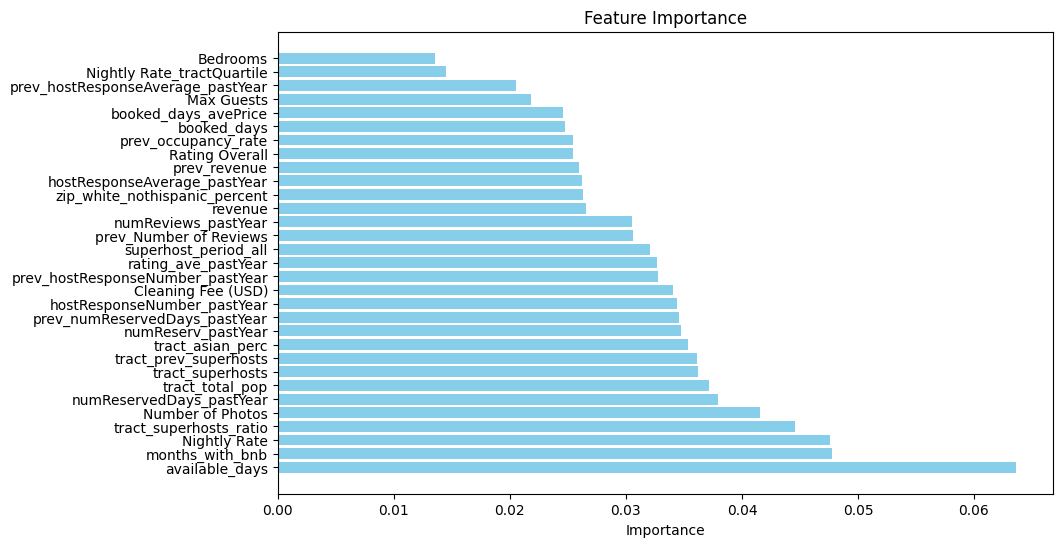

In [33]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [34]:
# Adjust the threshold (replace 0.5 with your desired threshold)
custom_threshold = 0.12
y_pred_custom = (y_probs > custom_threshold).astype(int)

# Evaluate the model
accuracy_custom = accuracy_score(y_test, y_pred_custom)
conf_matrix_custom = confusion_matrix(y_test, y_pred_custom)

# Displaying the results
print("Accuracy with Custom Threshold:", accuracy_custom)
print("Confusion Matrix with Custom Threshold:\n", conf_matrix_custom)
sensitivity = conf_matrix_custom[1, 1] / (conf_matrix_custom[1, 0] + conf_matrix_custom[1, 1] + 1e-10)  # Adding a small value to avoid division by zero
specificity = conf_matrix_custom[0, 0] / (conf_matrix_custom[0, 0] + conf_matrix_custom[0, 1] + 1e-10)
print("sensitivity:", sensitivity)
print("specificity:", specificity)

Accuracy with Custom Threshold: 0.7514376996805112
Confusion Matrix with Custom Threshold:
 [[16970  5561]
 [  663  1846]]
sensitivity: 0.7357512953367582
specificity: 0.7531845013536872


In [35]:
y_probs

array([0.07, 0.09, 0.01, ..., 0.9 , 0.06, 0.03])

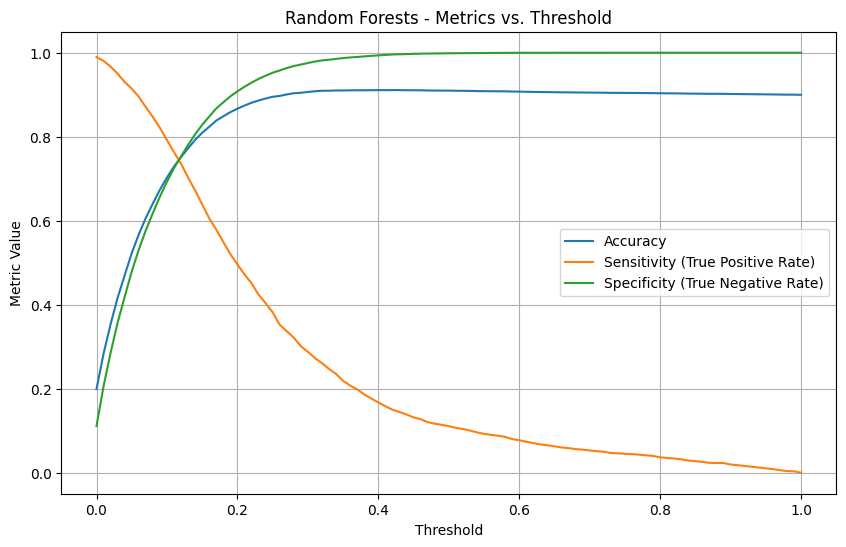

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming you have calculated y_pred and y_test before this point

# Create an array of threshold values
thresholds = np.arange(0, 1.01, 0.01)

# Initialize empty lists to store metrics
accuracy_list = []
sensitivity_list = []
specificity_list = []

# Calculate metrics for each threshold
for threshold in thresholds:
    #y_pred = result_final.predict(X_test_final)
    y_pred_binary = (y_probs > threshold).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred_binary)
    conf_matrix = confusion_matrix(y_test, y_pred_binary)
    
    sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1] + 1e-10)  # Adding a small value to avoid division by zero
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1] + 1e-10)
    
    accuracy_list.append(accuracy)
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy_list, label='Accuracy')
plt.plot(thresholds, sensitivity_list, label='Sensitivity (True Positive Rate)')
plt.plot(thresholds, specificity_list, label='Specificity (True Negative Rate)')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Random Forests - Metrics vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


In [37]:


# Assuming 'y_pred_custom' is a column in the original DataFrame
custom_threshold = 0.12
X_test['y_probs'] = y_probs
X_test['y_test'] = y_test
X_test['y_pred_custom'] = (X_test['y_probs'] > custom_threshold).astype(int)

# Filter the DataFrame based on the condition y_pred_custom = 1
filtered_data = X_test[X_test['y_pred_custom'] == 1]

# Display the new DataFrame with instances where y_pred_custom is 1
print("Filtered DataFrame:")
print(filtered_data[['y_probs', 'revenue']])  # Add other input variables as needed


Filtered DataFrame:
        y_probs  revenue
123223     0.14      0.0
98466      0.19    874.0
77158      0.17      0.0
84505      0.21      0.0
96343      0.22      0.0
...         ...      ...
93320      0.25      0.0
93833      0.28  38071.0
25654      0.13   2340.0
87848      0.16      0.0
119060     0.90    659.0

[7407 rows x 2 columns]


In [38]:
filtered_data[(filtered_data['revenue'] > 0)][['y_probs', 'revenue', 'y_test']]

,y_probs,revenue,y_test
98466,0.19,874.0,0
128023,0.14,7164.0,0
133624,0.15,1627.0,1
35990,0.16,3144.0,0
61140,0.15,5709.0,0
...,...,...,...
107230,0.25,1742.0,1
92090,0.15,1520.0,0
93833,0.28,38071.0,0
25654,0.13,2340.0,0


In [39]:
filtered_data[(filtered_data['revenue'] > 0) & (filtered_data['y_test'] > 0)][['y_probs', 'revenue', 'y_test']]


,y_probs,revenue,y_test
133624,0.15,1627.0,1
98685,0.35,38.0,1
101098,0.17,297.0,1
58055,0.31,1983.0,1
106097,0.18,626.0,1
...,...,...,...
101832,0.33,200.0,1
117395,0.73,609.0,1
75605,0.22,1500.0,1
107230,0.25,1742.0,1


In [40]:
prd_not20_model_vars_imputed[prd_not20_model_vars_imputed['Prop_Churned'] == 1]['months_with_bnb'].describe()

count    11981.000000
mean        18.213254
std         19.043313
min          0.000000
25%          4.000000
50%         12.000000
75%         27.000000
max        134.000000
Name: months_with_bnb, dtype: float64

In [41]:
prd_not20_model_vars_imputed

,superhost_period_all,rating_ave_pastYear,numReviews_pastYear,numReservedDays_pastYear,numReserv_pastYear,prev_numReservedDays_pastYear,hostResponseNumber_pastYear,hostResponseAverage_pastYear,prev_hostResponseNumber_pastYear,prev_hostResponseAverage_pastYear,...,prev_occupancy_rate,tract_total_pop,tract_asian_perc,zip_white_nothispanic_percent,Nightly Rate_tractQuartile,tract_superhosts,tract_superhosts_ratio,tract_prev_superhosts,months_with_bnb,Prop_Churned
25983,5.0,4.405738,244.0,2427.0,386.0,1677.0,206.0,93.912621,187.0,91.962567,...,0.000000,2682,12.6,43.1,0.0,2.0,0.052632,1.0,13,0
3946,5.0,4.142857,175.0,685.0,329.0,608.0,63.0,97.095238,54.0,96.629630,...,0.200913,3147,10.7,43.1,0.0,8.0,0.177778,7.0,44,0
54258,5.0,4.805195,77.0,1215.0,305.0,660.0,71.0,99.788732,54.0,99.722222,...,0.000000,5986,7.1,52.3,3.0,11.0,0.118280,9.0,1,0
40544,5.0,4.393443,122.0,921.0,293.0,558.0,59.0,88.271186,56.0,89.214286,...,0.182390,2890,6.4,1.3,0.0,0.0,0.000000,0.0,6,0
10616,5.0,4.869565,23.0,196.0,43.0,176.0,31.0,93.000000,29.0,88.379310,...,0.000000,5259,5.2,60.3,3.0,12.0,0.235294,9.0,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108907,19.0,4.900000,40.0,135.0,71.0,174.0,16.0,100.000000,21.0,100.000000,...,0.000000,3144,1.1,28.5,1.0,8.0,0.333333,7.0,24,0
18505,19.0,4.888889,9.0,183.0,47.0,204.0,22.0,98.636364,19.0,98.421053,...,0.005051,1708,3.9,28.5,2.0,5.0,0.263158,5.0,61,1
109783,19.0,4.797403,1925.0,13291.0,4223.0,12647.0,286.0,99.300699,319.0,99.673981,...,0.103139,4901,2.2,43.1,1.0,29.0,0.266055,31.0,23,0
20568,19.0,4.546624,311.0,1100.0,487.0,1132.0,108.0,98.509259,115.0,98.982609,...,0.009009,1711,10.5,76.4,0.0,8.0,0.126984,7.0,58,0


In [42]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')

# Assuming you have columns 'property_id' and 'revenue'
# You may need to adjust this based on your actual column names
property_id_column = 'Airbnb Property ID'
revenue_column = 'revenue'
period_column = 'superhost_period_all'

cumulative_rev = prd_not20[['Airbnb Property ID','revenue','superhost_period_all']]

cumulative_rev['revenue'].fillna(0, inplace=True)

# Sort the data by property_id and period
cumulative_rev = cumulative_rev.sort_values(by=[property_id_column, period_column])

# Calculate cumulative revenue for each property
cumulative_rev['cumulative_revenue'] = cumulative_rev.groupby(property_id_column)[revenue_column].cumsum()

print("DataFrame with Cumulative Revenue:")
print(cumulative_rev)


DataFrame with Cumulative Revenue:
        Airbnb Property ID  revenue  superhost_period_all  cumulative_revenue
0                   3192.0   2871.0                   7.0              2871.0
1                   3192.0   1089.0                   8.0              3960.0
2                   3192.0      0.0                   9.0              3960.0
3                   3192.0      0.0                  11.0              3960.0
4                   3297.0      0.0                   5.0                 0.0
...                    ...      ...                   ...                 ...
133726          42755572.0      0.0                  19.0                 0.0
133731          42765421.0      0.0                  19.0                 0.0
133733          42766072.0      0.0                  19.0                 0.0
133736          42776834.0      0.0                  19.0                 0.0
133739          42810117.0      0.0                  19.0                 0.0

[125196 rows x 4 columns]


/tmp/ipykernel_19/1107710895.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_rev['revenue'].fillna(0, inplace=True)


In [43]:
cumulative_rev['revenue'].value_counts()

revenue
0.0        57209
300.0        241
600.0        215
900.0        176
450.0        175
           ...  
17478.0        1
6199.0         1
3288.0         1
11223.0        1
17707.0        1
Name: count, Length: 19979, dtype: int64

In [44]:
prd5.groupby('Airbnb Property ID')['revenue'].cumsum()

25983        NaN
3946      6902.0
54258     5403.0
40544       30.0
10616     2311.0
          ...   
47009     4166.0
22408      648.0
12677    17063.0
45569     6409.0
51117     3016.0
Name: revenue, Length: 4257, dtype: float64

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming X is your feature matrix and y is your target variable
# X should be a DataFrame with the predictor variables, and y should be a Series with the target variable.

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a gradient boosting model
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data with probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Adjust the threshold (replace 0.5 with your desired threshold)
custom_threshold = 0.5
y_pred_custom = (y_probs > custom_threshold).astype(int)

# Evaluate the model
accuracy_custom = accuracy_score(y_test, y_pred_custom)
conf_matrix_custom = confusion_matrix(y_test, y_pred_custom)

# Calculate sensitivity and specificity
tn, fp, fn, tp = conf_matrix_custom.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Displaying the results
print("Accuracy with Custom Threshold:", accuracy_custom)
print("Confusion Matrix with Custom Threshold:\n", conf_matrix_custom)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)


Accuracy with Custom Threshold: 0.9031549520766773
Confusion Matrix with Custom Threshold:
 [[22514    17]
 [ 2408   101]]
Sensitivity (Recall): 0.04025508170585891
Specificity: 0.9992454839998225


In [46]:
# Adjust the threshold (replace 0.5 with your desired threshold)
custom_threshold = 0.095
y_pred_custom = (y_probs > custom_threshold).astype(int)

# Evaluate the model
accuracy_custom = accuracy_score(y_test, y_pred_custom)
conf_matrix_custom = confusion_matrix(y_test, y_pred_custom)

# Displaying the results
print("Accuracy with Custom Threshold:", accuracy_custom)
print("Confusion Matrix with Custom Threshold:\n", conf_matrix_custom)
sensitivity = conf_matrix_custom[1, 1] / (conf_matrix_custom[1, 0] + conf_matrix_custom[1, 1] + 1e-10)  # Adding a small value to avoid division by zero
specificity = conf_matrix_custom[0, 0] / (conf_matrix_custom[0, 0] + conf_matrix_custom[0, 1] + 1e-10)
print("sensitivity:", sensitivity)
print("specificity:", specificity)

Accuracy with Custom Threshold: 0.6937699680511182
Confusion Matrix with Custom Threshold:
 [[15623  6908]
 [  760  1749]]
sensitivity: 0.697090474292519
specificity: 0.69340020416315


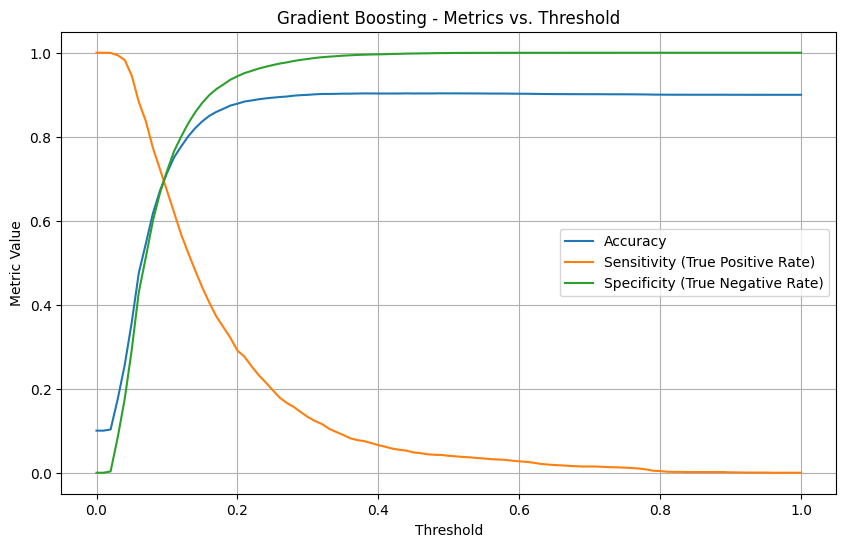

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming you have calculated y_pred and y_test before this point

# Create an array of threshold values
thresholds = np.arange(0, 1.01, 0.01)

# Initialize empty lists to store metrics
accuracy_list = []
sensitivity_list = []
specificity_list = []

# Calculate metrics for each threshold
for threshold in thresholds:
    #y_pred = result_final.predict(X_test_final)
    y_pred_binary = (y_probs > threshold).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred_binary)
    conf_matrix = confusion_matrix(y_test, y_pred_binary)
    
    sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1] + 1e-10)  # Adding a small value to avoid division by zero
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1] + 1e-10)
    
    accuracy_list.append(accuracy)
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy_list, label='Accuracy')
plt.plot(thresholds, sensitivity_list, label='Sensitivity (True Positive Rate)')
plt.plot(thresholds, specificity_list, label='Specificity (True Negative Rate)')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Gradient Boosting - Metrics vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


In [48]:
# Print feature importance
feature_importance = model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importance
print(feature_importance_df)


                              Feature  Importance
10                     available_days    0.226434
30                    months_with_bnb    0.113315
1                 rating_ave_pastYear    0.076690
11                        booked_days    0.076591
7        hostResponseAverage_pastYear    0.059983
8    prev_hostResponseNumber_pastYear    0.049286
16                   Number of Photos    0.047832
3            numReservedDays_pastYear    0.034939
15                 Cleaning Fee (USD)    0.033572
21                       prev_revenue    0.031943
0                superhost_period_all    0.029164
4                  numReserv_pastYear    0.028070
6         hostResponseNumber_pastYear    0.025428
12               booked_days_avePrice    0.023437
17                       Nightly Rate    0.022556
22                prev_occupancy_rate    0.016461
2                 numReviews_pastYear    0.016135
20                            revenue    0.016065
18             prev_Number of Reviews    0.015743


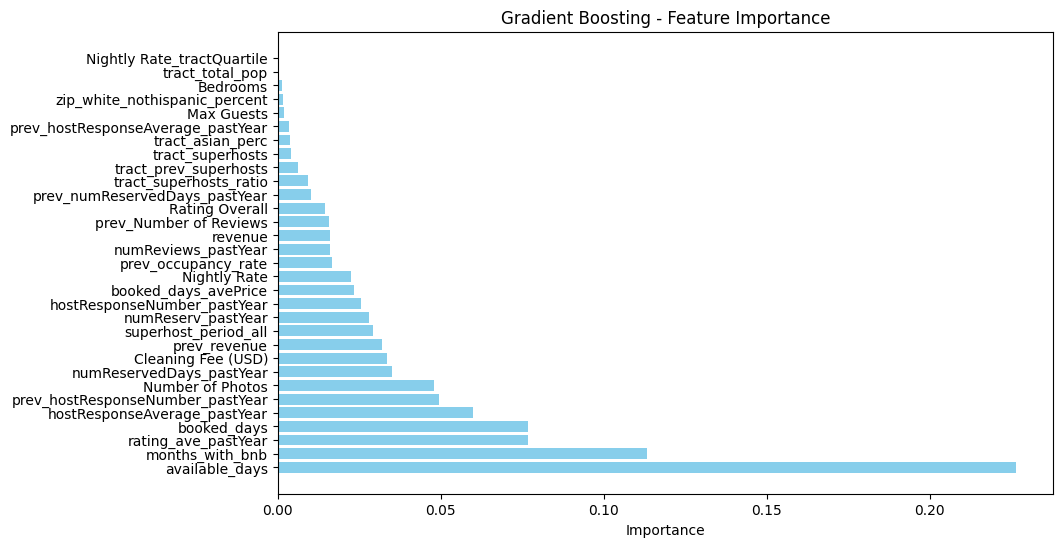

In [49]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Gradient Boosting - Feature Importance')
plt.show()


In [50]:
prd20_X = prd20_model_vars_imputed.drop('Prop_Churned', axis=1)


In [51]:
prd20_X.columns

Index(['Airbnb Property ID', 'superhost_period_all', 'rating_ave_pastYear',
       'numReviews_pastYear', 'numReservedDays_pastYear', 'numReserv_pastYear',
       'prev_numReservedDays_pastYear', 'hostResponseNumber_pastYear',
       'hostResponseAverage_pastYear', 'prev_hostResponseNumber_pastYear',
       'prev_hostResponseAverage_pastYear', 'available_days', 'booked_days',
       'booked_days_avePrice', 'Bedrooms', 'Max Guests', 'Cleaning Fee (USD)',
       'Number of Photos', 'Nightly Rate', 'prev_Number of Reviews',
       'Rating Overall', 'revenue', 'prev_revenue', 'prev_occupancy_rate',
       'tract_total_pop', 'tract_asian_perc', 'zip_white_nothispanic_percent',
       'Nightly Rate_tractQuartile', 'tract_superhosts',
       'tract_superhosts_ratio', 'tract_prev_superhosts', 'months_with_bnb'],
      dtype='object')

In [52]:
prd20_X = prd20_X.drop('Airbnb Property ID', axis=1)

In [53]:


# Now, you can use prd20_X_with_const for prediction
prd20_y_probs = rf_model.predict_proba(prd20_X)[:, 1] 

# The predicted probabilities for the positive class will be in prd20_y_probs


In [54]:
prd20_y_probs

array([0.31, 0.12, 0.18, ..., 0.15, 0.11, 0.23])

In [55]:
prd20_X[prd20_X['revenue']>0]

,superhost_period_all,rating_ave_pastYear,numReviews_pastYear,numReservedDays_pastYear,numReserv_pastYear,prev_numReservedDays_pastYear,hostResponseNumber_pastYear,hostResponseAverage_pastYear,prev_hostResponseNumber_pastYear,prev_hostResponseAverage_pastYear,...,prev_revenue,prev_occupancy_rate,tract_total_pop,tract_asian_perc,zip_white_nothispanic_percent,Nightly Rate_tractQuartile,tract_superhosts,tract_superhosts_ratio,tract_prev_superhosts,months_with_bnb
109210,20.0,5.000000,46.0,305.0,53.0,333.0,21.0,100.000000,20.0,100.000000,...,0.0,0.000000,4915,11.8,60.3,0.0,75.0,0.460123,72.0,26
133227,20.0,5.000000,3.0,0.0,0.0,220.0,4.0,100.000000,23.0,100.000000,...,0.0,0.000000,4947,4.4,72.9,0.0,15.0,0.468750,13.0,3
47242,20.0,5.000000,5.0,66.0,7.0,66.0,21.0,100.000000,20.0,100.000000,...,1343.0,0.386364,2538,5.7,60.3,1.0,64.0,0.444444,65.0,49
100076,20.0,4.443425,327.0,2865.0,981.0,2815.0,144.0,98.972222,192.0,98.416667,...,0.0,0.000000,3425,2.9,60.9,0.0,31.0,0.303922,29.0,32
133233,20.0,4.603774,53.0,263.0,71.0,177.0,45.0,99.888889,19.0,100.000000,...,0.0,0.000000,2861,13.6,52.3,0.0,14.0,0.157303,16.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60888,20.0,4.540816,98.0,1017.0,232.0,1054.0,109.0,99.201835,101.0,99.138614,...,441.0,0.037344,4822,4.9,43.1,1.0,50.0,0.420168,45.0,43
126180,20.0,4.898876,89.0,330.0,114.0,386.0,32.0,100.000000,35.0,100.000000,...,2005.0,0.173333,4033,3.9,60.3,0.0,26.0,0.320988,24.0,12
60866,20.0,4.833333,6.0,189.0,52.0,267.0,10.0,100.000000,19.0,100.000000,...,0.0,0.000000,5154,3.1,60.9,0.0,26.0,0.325000,26.0,43
10469,20.0,5.000000,6.0,87.0,27.0,87.0,21.0,88.714286,16.0,91.625000,...,117.0,0.012346,4256,0.5,3.2,2.0,11.0,0.440000,12.0,73


In [56]:
prd20_X['revenue'].value_counts()

revenue
0.0       4842
300.0       27
200.0       22
120.0       19
100.0       19
          ... 
459.0        1
2954.0       1
820.0        1
2135.0       1
312.0        1
Name: count, Length: 2327, dtype: int64

In [57]:
len(prd20_y_probs)

8545

In [58]:
prd20_X['churn_prob'] = prd20_y_probs

In [59]:
prd20_X

,superhost_period_all,rating_ave_pastYear,numReviews_pastYear,numReservedDays_pastYear,numReserv_pastYear,prev_numReservedDays_pastYear,hostResponseNumber_pastYear,hostResponseAverage_pastYear,prev_hostResponseNumber_pastYear,prev_hostResponseAverage_pastYear,...,prev_occupancy_rate,tract_total_pop,tract_asian_perc,zip_white_nothispanic_percent,Nightly Rate_tractQuartile,tract_superhosts,tract_superhosts_ratio,tract_prev_superhosts,months_with_bnb,churn_prob
129877,20.0,4.571429,14.0,0.0,0.0,0.0,12.0,75.833333,2.0,94.500000,...,0.000000,1711,10.5,76.4,3.0,6.0,0.101695,8.0,4,0.31
109210,20.0,5.000000,46.0,305.0,53.0,333.0,21.0,100.000000,20.0,100.000000,...,0.000000,4915,11.8,60.3,0.0,75.0,0.460123,72.0,26,0.12
110444,20.0,4.888889,90.0,738.0,160.0,725.0,54.0,100.000000,55.0,100.000000,...,0.253165,2547,5.7,40.8,0.0,43.0,0.425743,40.0,25,0.18
133227,20.0,5.000000,3.0,0.0,0.0,220.0,4.0,100.000000,23.0,100.000000,...,0.000000,4947,4.4,72.9,0.0,15.0,0.468750,13.0,3,0.19
47242,20.0,5.000000,5.0,66.0,7.0,66.0,21.0,100.000000,20.0,100.000000,...,0.386364,2538,5.7,60.3,1.0,64.0,0.444444,65.0,49,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126180,20.0,4.898876,89.0,330.0,114.0,386.0,32.0,100.000000,35.0,100.000000,...,0.173333,4033,3.9,60.3,0.0,26.0,0.320988,24.0,12,0.05
33712,20.0,4.823529,51.0,548.0,139.0,646.0,79.0,98.392405,70.0,98.185714,...,0.230769,3190,4.2,60.3,1.0,32.0,0.390244,38.0,55,0.04
60866,20.0,4.833333,6.0,189.0,52.0,267.0,10.0,100.000000,19.0,100.000000,...,0.000000,5154,3.1,60.9,0.0,26.0,0.325000,26.0,43,0.15
10469,20.0,5.000000,6.0,87.0,27.0,87.0,21.0,88.714286,16.0,91.625000,...,0.012346,4256,0.5,3.2,2.0,11.0,0.440000,12.0,73,0.11


In [60]:
prd20_X[(prd20_X['revenue'] > 0) & (prd20_X['churn_prob'] > 0.12)][['churn_prob', 'revenue']]


,churn_prob,revenue
133227,0.19,3945.0
47242,0.20,1975.0
133233,0.28,198.0
129883,0.32,1749.0
133231,0.17,4628.0
...,...,...
10394,0.14,994.0
10437,0.15,1232.0
116511,0.14,2992.0
60866,0.15,150.0


In [61]:
prd20_X[(prd20_X['revenue'] > 0)][['churn_prob', 'revenue']]

,churn_prob,revenue
109210,0.12,4140.0
133227,0.19,3945.0
47242,0.20,1975.0
100076,0.00,58.0
133233,0.28,198.0
...,...,...
60888,0.06,145.0
126180,0.05,3498.0
60866,0.15,150.0
10469,0.11,312.0


In [62]:
! pip install linearmodels

  Obtaining dependency information for linearmodels from https://files.pythonhosted.org/packages/2b/5f/6337a61309011eead6c3d8da74c42b56792cee6412619f77b268f9a5eb44/linearmodels-5.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for pyhdfe>=0.1 from https://files.pythonhosted.org/packages/2f/51/cb006fbc08c32f161035fb19ca718250eb5f6d0692ea6dcc1e62c3e556a2/pyhdfe-0.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for formulaic>=0.6.5 from https://files.pythonhosted.org/packages/2c/09/7a9f95d35106d882f79ddabc2d33d8f2a262863f1f5d6fd00f46c5fc90aa/formulaic-1.0.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 10.2 MB/s eta 0:00:00


In [63]:
import pandas as pd
from linearmodels.panel import RandomEffects

# Assuming your DataFrame is named 'df'
# Load your data into a DataFrame
df = pd.read_csv('/kaggle/input/airbnb-washington/airbnb_Washington.csv')

# Drop unnecessary columns and handle missing values
df = df.dropna(subset=['Superhost', 'hostResponseNumber_pastYear', 'numCancel_pastYear', 'num_5_star_Rev_pastYear'])

# Create a panel data structure
# Assuming your DataFrame has a suitable structure for panel data (e.g., time and entity columns)
# You might need to set the index appropriately, e.g., df.set_index(['time_column', 'entity_column'], inplace=True)
# Then, you can use the following:
panel_data = df.set_index(['Airbnb Host ID','superhost_period_all'])

# Perform random-effects panel regression
model = RandomEffects.from_formula('Superhost ~ hostResponseNumber_pastYear + numCancel_pastYear + num_5_star_Rev_pastYear', data=panel_data)
results = model.fit()

# Display regression results
print(results)


                        RandomEffects Estimation Summary                        
Dep. Variable:              Superhost   R-squared:                        0.0211
Estimator:              RandomEffects   R-squared (Between):              0.0549
No. Observations:               94535   R-squared (Within):               0.0153
Date:                Tue, Jan 09 2024   R-squared (Overall):              0.1006
Time:                        23:11:26   Log-likelihood                -2.426e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      678.86
Entities:                        8928   P-value                           0.0000
Avg Obs:                       10.589   Distribution:                 F(3,94532)
Min Obs:                       1.0000                                           
Max Obs:                       1237.0   F-statistic (robust):             678.86
                            